In [ ]:
import pandas as pd
import numpy as np
import scipy.stats

### Import Data

In [ ]:
train = pd.read_csv('1Dataset Andaat_Data Latih.csv')
test = pd.read_csv('1Dataset Andaat_Data Uji.csv')

In [ ]:
train

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,5.0,Spring flowers theme couleurs d t space,ART_AND_DESIGN,1,2.9M,100+,Free,0,Everyone,Art & Design,4.0 and up
1,4.8,Harley Quinn wallpapers HD,ART_AND_DESIGN,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,3.0 and up
2,4.8,Cardi B Wallpaper,ART_AND_DESIGN,253,3.7M,"50,000+",Free,0,Everyone,Art & Design,4.0 and up
3,4.8,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,1216,8.6M,"10,000+",Paid,$1.99,Everyone,Art & Design,4.1 and up
4,4.8,AJ Styles HD Wallpapers,ART_AND_DESIGN,48,25M,"5,000+",Free,0,Everyone,Art & Design,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...
9565,3.7,DS Thermometer,WEATHER,631,3.0M,"100,000+",Free,0,Everyone,Weather,2.3 and up
9566,3.6,Klart.se - Sweden's best weather,WEATHER,7623,19M,"1,000,000+",Free,0,Everyone,Weather,4.4 and up
9567,3.5,SMHI Weather,WEATHER,11297,Varies with device,"1,000,000+",Free,0,Everyone,Weather,Varies with device
9568,3.5,Storm Shield,WEATHER,2000,14M,"100,000+",Free,0,Everyone,Weather,5.0 and up


### Drop Duplicates

In [ ]:
train=train.drop_duplicates()

### Ubah Kategori dan Standardisasi

In [ ]:
frames = [train,test]
gabung = pd.concat(frames)

In [ ]:
gabung.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,5.0,Spring flowers theme couleurs d t space,ART_AND_DESIGN,1,2.9M,100+,Free,0,Everyone,Art & Design,4.0 and up
1,4.8,Harley Quinn wallpapers HD,ART_AND_DESIGN,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,3.0 and up
2,4.8,Cardi B Wallpaper,ART_AND_DESIGN,253,3.7M,"50,000+",Free,0,Everyone,Art & Design,4.0 and up
3,4.8,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,1216,8.6M,"10,000+",Paid,$1.99,Everyone,Art & Design,4.1 and up
4,4.8,AJ Styles HD Wallpapers,ART_AND_DESIGN,48,25M,"5,000+",Free,0,Everyone,Art & Design,4.1 and up


Ubah Kategori Android Version

In [ ]:
gabung['Android Ver'].value_counts()

4.1 and up            2379
4.0.3 and up          1458
4.0 and up            1338
Varies with device    1221
4.4 and up             893
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
gabung['Android Ver'][gabung['Android Ver']=='4.4W and up']='4.4 and up'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
gabung.loc[gabung['Android Ver'].isin((gabung['Android Ver'].value_counts()[gabung['Android Ver'].value_counts() < 50]).index), 'Android Ver'] = 'other'

In [ ]:
gabung['Android Ver'].value_counts()

4.1 and up            2379
4.0.3 and up          1458
4.0 and up            1338
Varies with device    1221
4.4 and up             904
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
other                  189
2.1 and up             133
1.6 and up             116
6.0 and up              58
Name: Android Ver, dtype: int64

Ubah Kategori Content Rating

In [ ]:
gabung['Content Rating'].value_counts()

Everyone           8387
Teen               1146
Mature 17+          449
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
gabung['Content Rating'][gabung['Content Rating']=='Everyone 10+']='Everyone'
gabung['Content Rating'][gabung['Content Rating']=='Unrated']='Everyone'
gabung['Content Rating'][gabung['Content Rating']=='Adults only 18+']='Mature 17+'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
gabung['Content Rating'].value_counts()

Everyone      8766
Teen          1146
Mature 17+     452
Name: Content Rating, dtype: int64

Isi NaN type

In [ ]:
gabung['Type'].value_counts()

Free    9597
Paid     766
Name: Type, dtype: int64

In [ ]:
gabung['Type'][gabung['Type'].isna()==True]='Free'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
gabung['Type'].value_counts()

Free    9598
Paid     766
Name: Type, dtype: int64

Bikin dummy kategori

In [ ]:
dms = pd.get_dummies(gabung[['Category']])
dms.head()

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gabung= pd.concat([gabung,dms], axis=1 )
gabung

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,5.0,Spring flowers theme couleurs d t space,ART_AND_DESIGN,1,2.9M,100+,Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,4.8,Harley Quinn wallpapers HD,ART_AND_DESIGN,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
2,4.8,Cardi B Wallpaper,ART_AND_DESIGN,253,3.7M,"50,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,4.8,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,1216,8.6M,"10,000+",Paid,$1.99,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,4.8,AJ Styles HD Wallpapers,ART_AND_DESIGN,48,25M,"5,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,NaN,EW Neuron Scan,TOOLS,1,6.5M,10+,Free,0,Everyone,Tools,...,0,0,0,0,0,0,1,0,0,0
1266,NaN,NATIVE ENTERTAINMENT MAGAZINE - ISSUE # 1,NEWS_AND_MAGAZINES,0,62M,10+,Free,0,Mature 17+,News & Magazines,...,0,0,0,0,0,0,0,0,0,0
1267,NaN,EX File Explorer File Manage Pro,PRODUCTIVITY,1,6.3M,50+,Paid,$1.99,Everyone,Productivity,...,0,0,1,0,0,0,0,0,0,0
1268,NaN,Rejoin Your Ex,SOCIAL,0,29M,100+,Free,0,Everyone,Social,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
gabung = gabung.drop(['Category'],axis=1)

In [ ]:
dms = pd.get_dummies(gabung[['Type']])
gabung= pd.concat([gabung,dms], axis=1 )
gabung = gabung.drop(['Type'],axis=1)

In [ ]:
dms = pd.get_dummies(gabung[['Content Rating']])
gabung= pd.concat([gabung,dms], axis=1 )
gabung = gabung.drop(['Content Rating'],axis=1)

In [ ]:
gabung=gabung.drop(['Genres'],axis=1)

In [ ]:
dms = pd.get_dummies(gabung[['Android Ver']])
gabung= pd.concat([gabung,dms], axis=1 )
gabung = gabung.drop(['Android Ver'],axis=1)

In [ ]:
gabung

,Rating,App,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Android Ver_4.0 and up,Android Ver_4.0.3 and up,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_5.0 and up,Android Ver_6.0 and up,Android Ver_Varies with device,Android Ver_other
0,5.0,Spring flowers theme couleurs d t space,1,2.9M,100+,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4.8,Harley Quinn wallpapers HD,192,6.0M,"10,000+",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.8,Cardi B Wallpaper,253,3.7M,"50,000+",0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.8,X Launcher Pro - IOS Style Theme & Control Center,1216,8.6M,"10,000+",$1.99,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.8,AJ Styles HD Wallpapers,48,25M,"5,000+",0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,NaN,EW Neuron Scan,1,6.5M,10+,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1266,NaN,NATIVE ENTERTAINMENT MAGAZINE - ISSUE # 1,0,62M,10+,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1267,NaN,EX File Explorer File Manage Pro,1,6.3M,50+,$1.99,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1268,NaN,Rejoin Your Ex,0,29M,100+,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gabung['coba'] = gabung['Size'].str.strip().str[-1]

In [ ]:
dms = pd.get_dummies(gabung[['Installs']])
gabung= pd.concat([gabung,dms], axis=1 )
gabung = gabung.drop(['Installs'],axis=1)

In [ ]:
gabung['Size'][gabung['coba']=='k']='< 1 Mb'
gabung['Size'][(gabung['coba']=='M')]='> 1 Mb'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
gabung=gabung.drop(['coba'],axis=1)

In [ ]:
dms = pd.get_dummies(gabung[['Size']])
gabung= pd.concat([gabung,dms], axis=1 )
gabung = gabung.drop(['Size'],axis=1)

In [ ]:
gabung['Price']=gabung.Price.str.extract('(\d.\d*)')

In [ ]:
gabung

,Rating,App,Reviews,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,"Installs_5,000,000+",Installs_50+,"Installs_50,000+","Installs_50,000,000+",Installs_500+,"Installs_500,000+","Installs_500,000,000+",Size_< 1 Mb,Size_> 1 Mb,Size_Varies with device
0,5.0,Spring flowers theme couleurs d t space,1,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.8,Harley Quinn wallpapers HD,192,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.8,Cardi B Wallpaper,253,NaN,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4.8,X Launcher Pro - IOS Style Theme & Control Center,1216,1.99,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.8,AJ Styles HD Wallpapers,48,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,NaN,EW Neuron Scan,1,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1266,NaN,NATIVE ENTERTAINMENT MAGAZINE - ISSUE # 1,0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1267,NaN,EX File Explorer File Manage Pro,1,1.99,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1268,NaN,Rejoin Your Ex,0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Isi NaN Price pake 0

In [ ]:
gabung['Price'] = gabung['Price'].fillna('0')

In [ ]:
train_pre = gabung.iloc[0:9093]
test_pre = gabung.iloc[9094:10364]

Drop NA in rating

In [ ]:
train_pre.isna().sum()

Rating                     204
App                          0
Reviews                      0
Price                        0
Category_ART_AND_DESIGN      0
                          ... 
Installs_500,000+            0
Installs_500,000,000+        0
Size_< 1 Mb                  0
Size_> 1 Mb                  0
Size_Varies with device      0
Length: 82, dtype: int64

In [ ]:
train_pre=train_pre.dropna()

In [ ]:
test_pre.isna().sum()

Rating                     1270
App                           0
Reviews                       0
Price                         0
Category_ART_AND_DESIGN       0
                           ... 
Installs_500,000+             0
Installs_500,000,000+         0
Size_< 1 Mb                   0
Size_> 1 Mb                   0
Size_Varies with device       0
Length: 82, dtype: int64

standardisasi

In [ ]:
train_pre

,Rating,App,Reviews,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,"Installs_5,000,000+",Installs_50+,"Installs_50,000+","Installs_50,000,000+",Installs_500+,"Installs_500,000+","Installs_500,000,000+",Size_< 1 Mb,Size_> 1 Mb,Size_Varies with device
0,5.0,Spring flowers theme couleurs d t space,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.8,Harley Quinn wallpapers HD,192,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.8,Cardi B Wallpaper,253,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4.8,X Launcher Pro - IOS Style Theme & Control Center,1216,1.99,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.8,AJ Styles HD Wallpapers,48,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,3.7,World Webcams,7896,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9565,3.7,DS Thermometer,631,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9566,3.6,Klart.se - Sweden's best weather,7623,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9567,3.5,SMHI Weather,11297,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
num=['Reviews','Price','Rating']

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
train_pre[num] = sc.fit_transform(train_pre[num])
test_pre[num] = sc.transform(test_pre[num])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Jadiin X y yeay

In [ ]:
X_trainn = train_pre.drop(['Rating','App'],axis=1)
y_trainn = train_pre.Rating
X_test = test_pre.drop(['Rating','App'], axis=1)
y_test = test_pre.Rating

### Splitting Dataset

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_trainn, y_trainn, test_size=0.3, random_state=42)

### Regression Modeling

Check Normality

In [ ]:
from scipy.stats import kstest
#perform Kolmogorov-Smirnov test
kstest(y_trainn, 'norm')

KstestResult(statistic=0.1538796224187653, pvalue=3.010348806403327e-183)

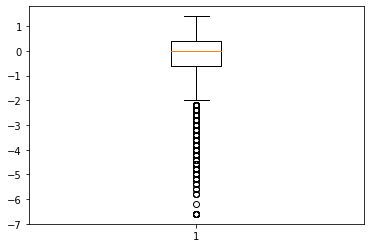

In [ ]:
import matplotlib.pyplot as plt

# Creating plot
plt.boxplot(y_trainn)

# show plot
plt.show()

Dia ga normal, tapii untuk keperluan analisis lebih lanjut, kita asumsikan normal saja yaahh~ kita bakal coba 3 metode saja karena Decision Tree baru bakal diajarin habis UTS.

Linear Model

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = regr.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_val, pred)))
mape = mean_absolute_percentage_error(y_val, pred)
mae = mean_absolute_error(y_val, pred)
r2 = r2_score(y_val, pred)
print('Testing performance')
print('MAPE: {:.4f}'.format(mape))
print('MAE: {:.4f}'.format(mae))
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

Testing performance
MAPE: 147181350678772.5312
MAE: 0.7221
RMSE: 1.0574
R2: 0.0589


Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model= Ridge().fit(X_train, y_train)

In [ ]:
y_pred= ridge_model.predict(X_val)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_val, y_pred)))
mape = mean_absolute_percentage_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print('Testing performance')
print('MAPE: {:.4f}'.format(mape))
print('MAE: {:.4f}'.format(mae))
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

Testing performance
MAPE: 146730571459948.8438
MAE: 0.7216
RMSE: 1.0567
R2: 0.0603


Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model= Lasso().fit(X_train, y_train)

In [ ]:
y_pred= lasso_model.predict(X_val)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_val, y_pred)))
mape = mean_absolute_percentage_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print('Testing performance')
print('MAPE: {:.4f}'.format(mape))
print('MAE: {:.4f}'.format(mae))
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

Testing performance
MAPE: 116610730278182.5938
MAE: 0.7546
RMSE: 1.0882
R2: 0.0033


### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = linear_model.LinearRegression()
# evaluate model
scores = cross_val_score(model, X_trainn, y_trainn, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('RMSE: %.4f (%.4f)' % (mean(np.sqrt(abs(scores))), std(scores)))

RMSE: 0.9993 (0.0415)


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = linear_model.Ridge()
# evaluate model
scores = cross_val_score(model, X_trainn, y_trainn, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('RMSE: %.4f (%.4f)' % (mean(np.sqrt(abs(scores))), std(scores)))

RMSE: 0.9992 (0.0418)


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = linear_model.Lasso()
# evaluate model
scores = cross_val_score(model, X_trainn, y_trainn, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('RMSE: %.4f (%.4f)' % (mean(np.sqrt(abs(scores))), std(scores)))

RMSE: 1.0427 (0.0409)
